# Convolutional Neural Networks in TensorFlow Week02

이미지 Augmentation

- 데이터셋이 부족하여 오버피팅 가능성이 있을 때
- 기존 데이터에 전처리를 가해 학습 데이터를 늘리는 방법
    - 회전, 기울이기, 확대/축소 등등
- 똑바로 서 있는 고양이 이미지만 있다고 하더라도 이런 방법을 통해 누워있거나 확대된 고양이 사진도 잘 판별할 수 있게 됨

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_horse_dir = os.path.join('../datasets/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('../datasets/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('../datasets/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('../datasets/validation-horse-or-human/humans')

In [2]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [3]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '../datasets/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '../datasets/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## ImageDataGenerator for Augmentation

- rotation_range: 0도에서 40도까지 랜덤하게 회전
- width_shift_range: 0~20 퍼센트만큼 랜덤하게 이동시킴
- shear_range: 시계반대방향으로 20퍼만큼 랜덤하게 기울임
- zoom_range: +-20퍼센트만큼 확대
- horizontal_flip: 좌우반전
- fill_mode: augmentation 하면서 주위 픽셀을 어떻게 채울 것인지

In [5]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 14s 2s/step - loss: 0.7013 - accuracy: 0.5381 - val_loss: 0.6733 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 14s 2s/step - loss: 0.6654 - accuracy: 0.6585 - val_loss: 0.6504 - val_accuracy: 0.5273
Epoch 3/100
8/8 [==============================] - 15s 2s/step - loss: 0.6705 - accuracy: 0.6140 - val_loss: 0.6168 - val_accuracy: 0.5625
Epoch 4/100
8/8 [==============================] - 14s 2s/step - loss: 0.6249 - accuracy: 0.6885 - val_loss: 0.5832 - val_accuracy: 0.9414
Epoch 5/100
8/8 [==============================] - 14s 2s/step - loss: 0.6064 - accuracy: 0.6830 - val_loss: 0.5927 - val_accuracy: 0.5859
Epoch 6/100
8/8 [==============================] - 16s 2s/step - loss: 0.5763 - accuracy: 0.7168 - val_loss: 0.8991 - val_accuracy: 0.5000
Epoch 7/100
8/8 [==============================] - 16s 2s/step - loss: 0.5664 - accuracy: 0.7158 - val_loss: 0.7369 - val_accuracy: 0.5156
Epoch 8/100
8/8 [==========

8/8 [==============================] - 16s 2s/step - loss: 0.3724 - accuracy: 0.8632 - val_loss: 1.3150 - val_accuracy: 0.6250
Epoch 60/100
8/8 [==============================] - 14s 2s/step - loss: 0.2429 - accuracy: 0.8932 - val_loss: 1.2264 - val_accuracy: 0.6406
Epoch 61/100
8/8 [==============================] - 16s 2s/step - loss: 0.2317 - accuracy: 0.9155 - val_loss: 1.2600 - val_accuracy: 0.6523
Epoch 62/100
8/8 [==============================] - 14s 2s/step - loss: 0.2476 - accuracy: 0.8943 - val_loss: 1.2077 - val_accuracy: 0.6719
Epoch 63/100
8/8 [==============================] - 14s 2s/step - loss: 0.2707 - accuracy: 0.8810 - val_loss: 0.8144 - val_accuracy: 0.7344
Epoch 64/100
8/8 [==============================] - 14s 2s/step - loss: 0.2341 - accuracy: 0.9110 - val_loss: 1.9801 - val_accuracy: 0.5898
Epoch 65/100
8/8 [==============================] - 14s 2s/step - loss: 0.1979 - accuracy: 0.9166 - val_loss: 1.9522 - val_accuracy: 0.5781
Epoch 66/100
8/8 [===============

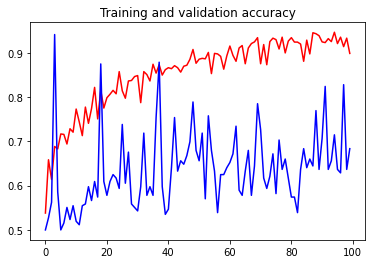

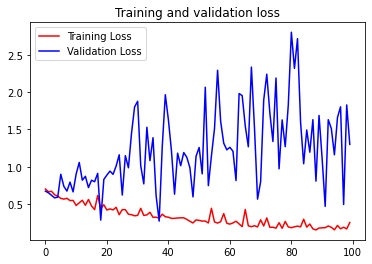

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

결과에서 볼 수 있듯이, training acc는 점점 좋아지지만 validation acc는 미친듯이 변동이 심함

이렇게 되는 이유는

- 사람은 보통 똑바로 서 있고 이미지가 중앙에 있음. 기울이거나 이동시키는게 큰 의미 없음
- training set에 augmentation으로 만들어진 특성이 validation data에는 없기 때문에 큰 효과를 발휘하지 못함
- 즉 augmentation이 만능은 아니라는 것임. 실제 데이터의 특성을 잘 반영한 augmentation이어야만 큰 효과를 발휘함